In [1]:
from caiman_online import analysis, plot, utils
from glob import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['savefig.dpi'] = 300 # default resolution for saving images in matplotlib
mpl.rcParams['savefig.format'] = 'png' # defaults to png for saved images (SVG is best, however)
mpl.rcParams['savefig.bbox'] = 'tight' # so saved graphics don't get chopped
mpl.rcParams['figure.constrained_layout.use'] = True # so I don't have to keep saying contrainsted_layout = True in all subplots

%config InlineBackend.figure_format = 'retina' # doesn't work in vscode

In [2]:
user_name = 'Mora'
date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'ori'

nplanes = 3

# this might vary depending on how everything is set up
# tif_folder = os.path.join('D:\\', user_name, date, mouse, exp_name)
tif_folder = 'E:/caiman_scratch/ori'
os.chdir(tif_folder)

In [17]:
js = glob('./out/*plane0*.json')

traces = []
for plane in range(nplanes):
    js_this_plane = glob(f'./out/*plane{plane}*.json')
    traces.append(analysis.concat_chunked_data(js_this_plane))

traces = np.concatenate(trial_data, axis=1)

C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Will\Anaconda3\envs\caiman-online\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 0.98, 'First 5 Trials')

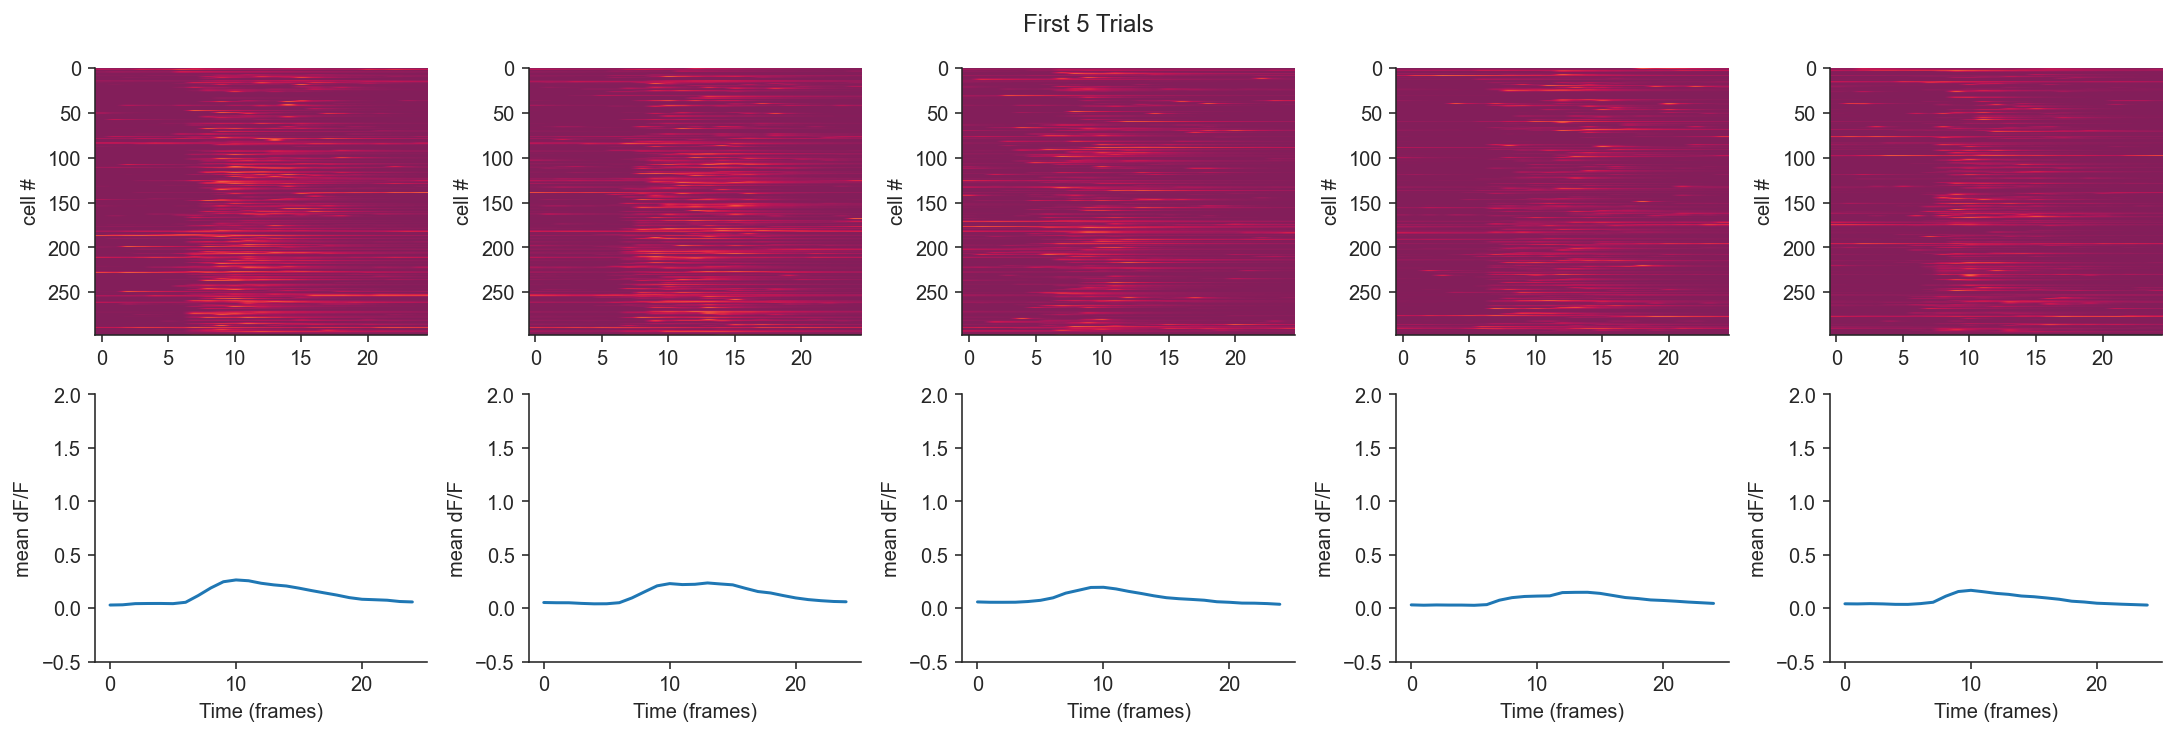

In [21]:
ncol=5
f, axes = plt.subplots(2,ncol, figsize=(3*ncol,ncol), constrained_layout=True)
axes = axes.ravel()

for i,ax in enumerate(axes[0:5]):
    ax.set_ylabel('cell #')
    ax.imshow(traces[i,:,:], aspect='auto', vmin=-1, vmax=2)
    #f.colorbar()

for i,ax in enumerate(axes[5:11]):
    ax.plot(np.mean(traces[i,:,:],axis =0))
    ax.set_ylim(-0.5,2)
    ax.set_ylabel('mean dF/F')
    ax.set_xlabel('Time (frames)')
    
plt.suptitle('First 5 Trials')